# Matplotlib: Getting started

Matplotlib is a Python library to make plots ([or graphs or charts](https://english.stackexchange.com/questions/43027/whats-the-difference-between-a-graph-a-chart-and-a-plot)).

On linux, you can install it with a package manager (unless you prefer to always work in a virtual environment). Otherwise use `pip install matplotlib`.

## Matplotlib has two APIs

1. An API originally intended to mimic matlab, called [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).
2. A newer
object oriented (OO) API.

The main differences between these two are

1. `pyplot` takes care of low level things like configuring the drawing "back-end".
2. `pyplot` maintains an internal state (e.g. a list of open figures).

If you are writing scripts, these are both nice things.
If you are writing applications, you'll often want to configure the back-end manually, and will want to avoid having any state outside of your own program's.

Here's an example using pyplot:

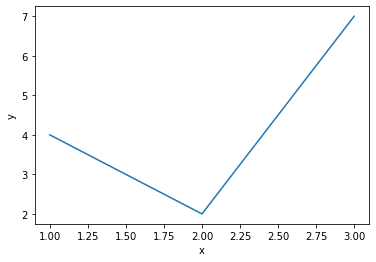

In [1]:
import matplotlib.pyplot as plt

# Create a figure, stored inside the pyplot module:
plt.figure()

# Plot something on the axes of our figure
plt.xlabel('x')
plt.ylabel('y')
plt.plot([1, 2, 3], [4, 2, 7])

# Show all open figures on the screen
plt.show()

After running this (in jupyter notebook), the figure is closed:

In [2]:
# We can try to show() again, but nothing happens
plt.show()

In [3]:
# Similarly, nothing happens if we close before showing
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.plot([1, 2, 3], [4, 2, 7])
plt.close('all')
plt.show()

If this smells a bit error-prone to you, you can use the object oriented interface instead.
(It's also just nicer.)

Unfortunately, figure creation without `pyplot` is a bit low-level:

In [4]:
# Load a back-end module and import its Canvas implementation
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Import the Figure class
from matplotlib.figure import Figure

# Create a figure without a "canvas"
fig = Figure()

# Attach a canvas to the figure
FigureCanvas(fig)

# Plot some things
ax = fig.add_subplot()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot([1, 2, 3], [4, 2, 7])

# But how do we show?

How do we know what backend to use? And what is a backend anyway? If you're using matplotlib from a script you probably don't want to think about this kind of stuff.

And how do we get jupyter notebook to show this figure?
It has nice magical ways to interact with pyplot, but now we'll need to do this manually instead.
Some online searching reveals it's like this:

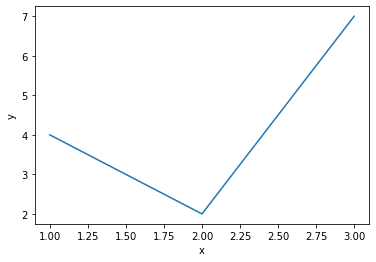

In [5]:
from IPython.core.display import display
display(fig)

### Solution: Use OO except for figure creation and display

So, we've got 2 APIs one of which is newer and more scalable, but too low level when it comes to figure creation and display.
We also want to avoid learning 2 APIs to the same software.

The best solution is probably to mix the APIs: use pyplot to create and display figures, but do everything else via the object oriented interface.

A full example follows below:

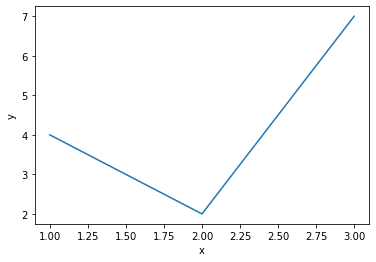

In [6]:
# Import pyplot (and let it load a backend)
import matplotlib.pyplot as plt

# Create a figure, attached to a canvas and stored inside the pyplot module,
# but also store a handle locally
fig = plt.figure()

# Add a set of axes
ax = fig.add_subplot()
ax.set_xlabel('x')
ax.set_ylabel('y')

# Plot something on the axes
ax.plot([1, 2, 3], [4, 2, 7])

# Show all open figures on the screen
plt.show()

### Naming

Even within the OO API, matplotlib's naming is massively inconsistent.

Sometimes you need underscores (`fig.add_suplot`) sometimes you don't (`ax.vline()`, `ax.legend(ncols=3)`) and sometimes you camel case (`ax.transData`).
Some things are partially abbreviated (`ax.set_xlim`, `ax.transData`) many are not.
Several keyword arguments have more than one form (`ax.plot([1,2,3], lw=2)` is the same as `ax.plot([1,2,3], linewidth=2)`).

This makes everything difficult to remember, so a lot of searching in the docs is required.

### Using Matplotlib's documentation

Matplotlib is well documented, and there are lots of tutorials and examples online (from "official" and unofficial sources).

Two things are worth knowing when you navigate the docs:

1. Since there are two APIs, you'll find similar documentation in two places. E.g. the docs for `pyplot.plot` coexist with the docs for `Axes.plot`. To look stuff up about the OO version of `plot`, you need to look at the docs for `Axes`.
2. Many methods follow a pattern where an object is created and any keyword arguments are passed to its constructor. For example, `Axes.plot` has only 6 arguments. When we call `ax.plot([1,2,3], alpha=3)` it creates a `Line2D` object and passes the `alpha=3` part to its constructor. This means the detailed information about keyword arguments to `ax.plot` are found under `matplotlib.lines.Line2D`! In many cases this is mitigated by duplicating part of the documentation.

### Figure size in jupyter notebook

As the examples above show, jupyter renders matplotlib figures a bit small by default.

To see how this happens, consider the steps involved:

1. A figure object is created
2. The object is rendered (rasterised) as a PNG (I guess) with some pixel size depending on the figure size in inches and matplotlib's DPI setting.
3. The PNG is incorporated into the notebook, and shown 1:1 (each pixel in the figure becomes a pixel on screen)

For whatever reason, jupyter's matplotlib backend has also chosen to render plots at 72 PPI (or DPI, in matplotlib's terminology), which will result in small figures on most modern screens.

I tried a few things to compensate this, but all have drawbacks :-(

## OK now let's actually get started

Below is a minimal example of a figure in matplotlib:

- Create a figure, using a figure size in [physical units](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/figure_size_units.html) (e.g. inches)

Next,

- Add axes labels.
  - Indicate any units (before you forget what they are).
  - You can [use latex syntax](https://matplotlib.org/stable/tutorials/text/mathtext.html) in your text.
- More than 1 line? Add a legend.

Do these things while designing.
Only once you're finished you can think about leaving out some labels, legends, etc.

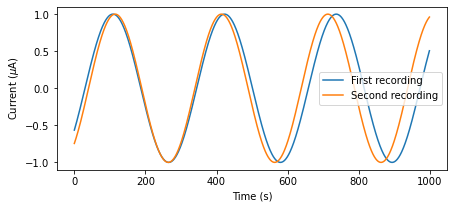

In [7]:
# Import matplotlib and numpy, generate some data
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 1000)
c1 = np.sin((t - 30) * 0.02)
c2 = np.sin((t - 40) * 0.021)

# Create a figure of 7 by 3 inches
fig = plt.figure(figsize=(7, 3))

# Add an axes object --- always set labels!
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')

# Plot the data
ax.plot(t, c1, label='First recording')
ax.plot(t, c2, label='Second recording')

# Add a legend
ax.legend()

# Show the figure
plt.show()

## Saving

To save your work, simply use `savefig`:

In [8]:
# Create a figure of 7 by 3 inches
fig = plt.figure(figsize=(7, 3))

# Add an axes object --- always set labels!
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')

# Plot the data
ax.plot(t, c1, label='First recording')
ax.plot(t, c2, label='Second recording')

# Add a legend
ax.legend()

# Store the figure
fig.savefig('figures/first-example.png')  # Save as png
fig.savefig('figures/first-example-hi-res.png', dpi=600)  # Save as png with higher DPI
fig.savefig('figures/first-example.pdf')  # Save as PDF (best format for latex)
plt.close()

We can also save as EPS, which throws up a warning:

In [9]:
# Create a figure of 7 by 3 inches
fig = plt.figure(figsize=(7, 3))

# Add an axes object --- always set labels!
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')

# Plot the data
ax.plot(t, c1, label='First recording')
ax.plot(t, c2, label='Second recording')

# Add a legend
ax.legend()

# Store the figure
fig.savefig('figures/first-example.eps')  # Save as EPS (for some journals)
plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


We didn't ask for any transparency, but the current (2022-05-09) matplotlib makes legends semi-transparent by default.
We can disable this to get a consistent result:

In [10]:
# Create a figure of 7 by 3 inches
fig = plt.figure(figsize=(7, 3))

# Add an axes object --- always set labels!
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current ($\mu$A)')

# Plot the data
ax.plot(t, c1, label='First recording')
ax.plot(t, c2, label='Second recording')

# Add a legend, set the alpha (transparency) values of its "frame" to 1 (fully opaque)
ax.legend(framealpha=1)

# Store the figure
fig.savefig('figures/first-example.eps')  # Save as EPS (for some journals)
plt.close()